# Fitting Polynomials with Linear Regression

[Kevin McGuinness](http://www.eeng.dcu.ie/~mcguinne/), School of Electronic Engineering, Dublin City University

----


In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import seaborn as sns
sns.set_style('white')

## Data generation

We generate $x$ uniformly from $[-10, 10]$. $y$ is a polynomial function of $x$ plus zero mean Gaussian noise:
$$
y = 0.3 x^3 - 0.2 x^2 + 2x + 2 + \epsilon
$$
with $\epsilon \sim \mathcal{N}(0, 40^2)$.

In [ ]:
def get_y_true(x):
    phi_x = np.c_[np.ones(x.shape[0]), x, x**2, x**3] 
    w = np.array([2, 2, -0.2, 0.3])
    y = np.dot(phi_x, w)
    return y

def generate_data(n=30):
    x = np.linspace(-10, 10, n)
    y = get_y_true(x)
    y_noisy = y + np.random.randn(n) * 40
    return x, y, y_noisy
    

In [ ]:
x, y_true, y_samples = generate_data()

Plot the generated data and noisless y values as a curve.

Text(0,0.5,'y')

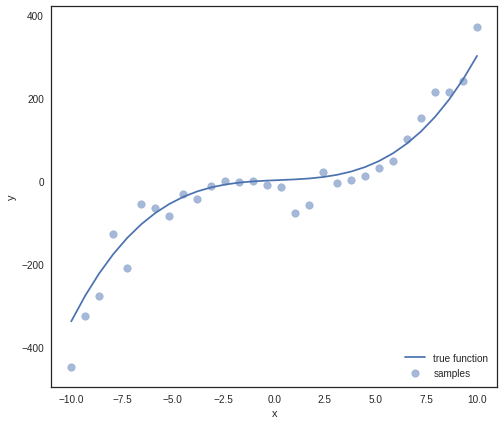

In [ ]:
figure(figsize=(8,7))
plot(x, y_true, label='true function')
scatter(x, y_samples, s=60, alpha=0.5, label='samples')
xlim(-11, 11)
legend(loc=4)
xlabel('x')
ylabel('y')

## Polynomial fitting

Although the function is clearly non-linear, the function *is* linear in the unknown coefficients (parameters). So we can use least squares (linear regression) to estimate the coefficients.

The function below fits polynomials of given degree by constructing a design matrix with a constant 1 and all the powers of $x$ up to the given degree. This is called a Vandermonde matrix. 

Here we solve the least squares problem using the pseudoinverse. You could just as easily use ``lstsq`` instead (**exercise**: try this!).

In [ ]:
def fit_polynomial(x, y, degree=3):
    X = np.array([x ** i for i in range(degree+1)]).T
    w = np.dot(np.linalg.pinv(X), y)
    return w

In [ ]:
w = fit_polynomial(x, y_samples)
print(w)

[-10.72753578  -3.27044777  -0.09578274   0.42471098]


## Plot the results

Let's compare the true polynomial with the estimated one.

In [ ]:
def plot_polynomial(w, x):
    X = np.array([x ** i for i in range(w.shape[0])]).T
    y = np.dot(X, w)
    plot(x, y, label='fit polynomial', color='purple', lw=2)

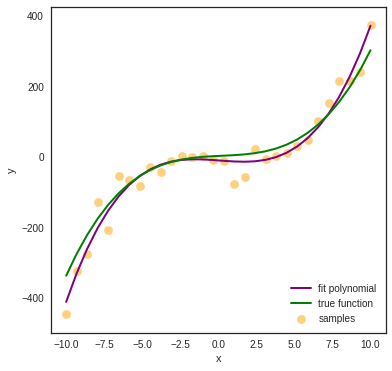

In [ ]:
figure(figsize=(6,6))
plot_polynomial(w, x)
plot(x, y_true, label='true function', ls='solid', lw=2, color='green')
scatter(x, y_samples, s=70, alpha=0.5, label='samples', c='orange')
xlim(-11, 11)
legend(loc=4)
xlabel('x')
ylabel('y')
show()

## Overfitting

The above worked quite well because we knew the true degree of the polynomial. You might think that increasing the degree of the fit polynomial can only lead to a better fit. 

This is true: increasing the degree of the fit polynomial will indeed reduce the error. **But the resulting fit will not generalize well to unseen data!** In this case, we say that we are **overfitting** the data: fitting the noise as well as the true underlying function.

Let's try fittinga  degree 15 polynomial to the previous data.

In [ ]:
w_over = fit_polynomial(x, y_samples, degree=15)

Text(0.5,1,'Overfitting with a polynomial of degree 25')

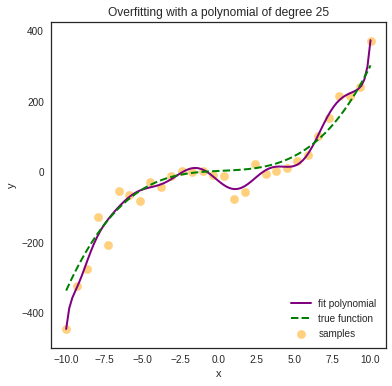

In [ ]:
x_expanded = np.linspace(-10, 10, 100)
figure(figsize=(6,6))
plot_polynomial(w_over, x_expanded)
plot(x_expanded, get_y_true(x_expanded), label='true function', ls='dashed', lw=2, color='green')
scatter(x, y_samples, s=70, alpha=0.5, label='samples', c='orange')
xlim(-11, 11)
legend(loc=4)
xlabel('x')
ylabel('y')
title('Overfitting with a polynomial of degree 25')

The resulting polynomial is very wiggly. The total mean squared error on the training data is lower, but it doesn't match the underlying function that generated the data very well.

The problem becomes much more visible when we expand slightly outside the domain of the original samples

Text(0.5,1,'Overfitting with a polynomial of degree 25')

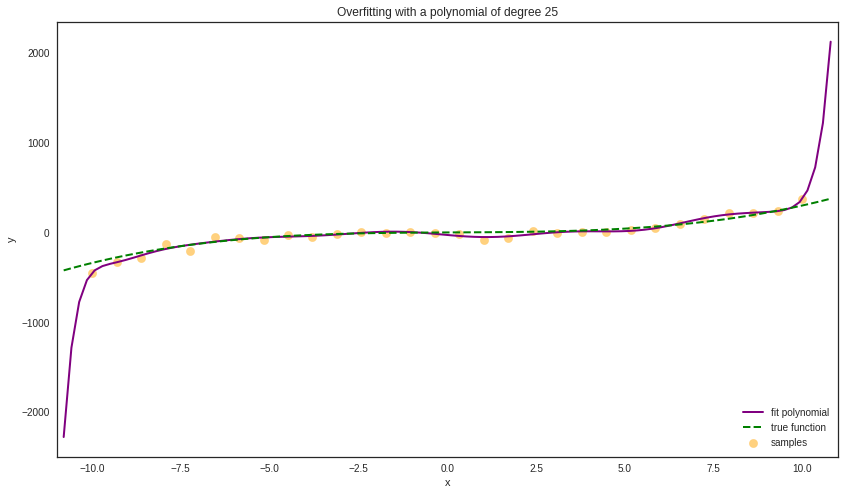

In [ ]:
x_expanded = np.linspace(-10.8, 10.8, 100)
figure(figsize=(14,8))
plot_polynomial(w_over, x_expanded)
plot(x_expanded, get_y_true(x_expanded), label='true function', ls='dashed', lw=2, color='green')
scatter(x, y_samples, s=70, alpha=0.5, label='samples', c='orange')
xlim(-11, 11)
legend(loc=4)
xlabel('x')
ylabel('y')
title('Overfitting with a polynomial of degree 25')

Notice the scale on the y axis! The function explodes outside the original range so rapidly that it makes the original function look almost flat. This 15-degree polynomial doesn't appear to generalize very well outside the training data!